# Machine Learning e o Sklearn

Vamos agora iniciar os trabalhos no campo do aprendizado de maquina e modelagem. Uma habilidade importantissima na área da ciência de dados é a capacidade de compressão e aferimento de informações. Dado uma esrutura de dados arbitrária, gostariamos de poder inferir informações desta estrutura de forma eficiente e correta. Para isso, utilizamos de metodos de compressão de dados, como modelos matemáticos, para comprimir esta informação de uma forma que torne sua aferição mais eficiênte do que se tivessemos que procurar nos dados pelos K vizinhos mais proximos, por exemplo. Muitos algoritmos diferentes de compressão e aferição estao disponíveis, e cada tarefa tem algum algoritmo ótimo que lhe serve. Neste contexto, o "*No Free Lunch theorem*" diz que, a priori, nenhum algoritmo de *machine learning* será melhor do que os outros, e apenas o teste pode revelar o algoritmo ótimo para dada tarefa.

Dentre os problemas envolvendi *machine learning*, fazemos três subdivisões:

- *Supervised Learning*, ou aprendizado supervisionado
- *Unsupervised Learning*, ou aprendizado não supervisionado
- *Reinforcement Learning*, ou aprendizado por reforço

Problemas de apendizado de funções de mapeamento entre variáveis de entrada e variáveis alvo com sinal de supervisão se enquandram na classe de *Supervised Learning*, e é deste tipo de problema que trataremos a seguir. Como curiosidade introdutória, algoritmos de *Unsupervised Learning* aprendem classificações (ou reduções) de pontos de dados a partir de suas propriedades inerentes e sem sinal de supervisão (variável alvo). Já os algoritmos destinados a resolver problemas de *Reinforcement Learning* aprendem representações de valor de estados do ambiente e politicas de agentes baseados em sinais de reforço obtidos do ambiente no qual estes agentes estão inseridos.

Dentre os problemas presentes no campo do apredizado supervisionado fazemos duas subdivisões, são elas problemas de regressão e de classificação. Modelos de regressão tem como saída variáveis geralmente continuas, e tentam prever o valor destas variáveis dadas variáveis de entradas independentes. Modelos de classificação, dadas determinadas entradas, tem como saída a probabilidade de dada amostra pertencer um classe Y dentre N possíveis classes.

Para exemplificar, vamos programar alguns modelos básicos.

No contexto de regressão, um dos modelos mais simples e muito utilizado é a [regressão linear](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression). O algoritmo utilizado para otimizar o modelo, neste caso, é o "[*Ordinary Least Squares*](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)". Muitos outros algoritmos de otimização estão disponíveis e falaremos sobre eles mais tarde. Vamos utilizar o API do [Sklearn](http://scikit-learn.org/stable/index.html) que já contém uma variedade de modelos de aprendizado de maquina implementados e prontos para serem empregados.

Inicialmente, vamos carregar o banco de dados a ser utilizado:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Carrega um dataset de exemplo, neste caso, dados de diabetes em pacientes americanos
diabetes = datasets.load_diabetes()

# Armazena as variáveis independentes para serem utilizadas de entrada no modelo
diabetes_X = diabetes.data[:, np.newaxis, 2]

print("Exemplo dos dados de variaveis independentes:\n",diabetes_X[:5])

print("\nExemplo dos dados de variaveis alvo:\n", diabetes.target[:5])

Exemplo dos dados de variaveis independentes:
 [[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]

Exemplo dos dados de variaveis alvo:
 [ 151.   75.  141.  206.  135.]


Para validar o modelo após o treinamento é necessário que se conserve amostras dos dados inéditas ao modelo, de forma que suas previsões utilizadas na validação sejam feitas em pontos de dados nunca antes vistos. Fazemos isto para obter uma medida de quão bem nosso modelo generaliza a estrutura presente depois do treinamento, dadas nova amostras de dados.
Subdividimos então nossos dados em dados de treino e dados de validação:

In [2]:
# Divide as entradas em dados de treino e dados de teste. Isto é necessário para verificar o aprendizado do modelo
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Divide os dados alvo em treino e teste
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Com os dados preparados, vamos instanciar o modelo desejado e ajustar esta instancia do modelo nos dados de treinamento.

### Regressão Linear

In [3]:
# Instancia o modelo linear do Sklearn como um objeto modelo regr
regr = linear_model.LinearRegression()

# Treina o modelo utilizando "Ordinary Least Squares"
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Finalizado o treinamento, podemos testar nosso modelo treinado com os dados de teste.

Coeficientes da regressão: 
 [ 938.23786125]
Erro quadrático médio: 2548.07
Variancia explicada: 0.47


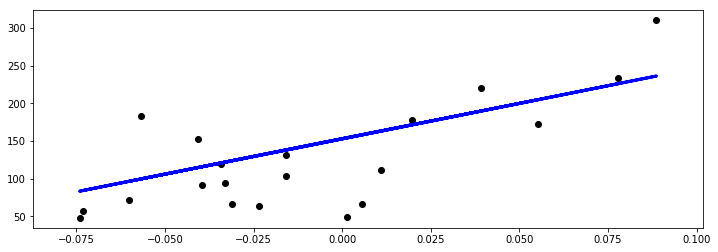

In [4]:
# Coeficientes da regressão
print('Coeficientes da regressão: \n', regr.coef_)
# Erro quadrático medio
print("Erro quadrático médio: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)) # adquire previsão do modelo para os dados
                                                                         # teste e calcula o erro medio quadrático
# Variancia explicada pelo modelo, 1 é o melhor score possível
print('Variancia explicada: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot
plt.figure(1, figsize=(12,4)) # define a figura e suas propriedades, como numero e tamanho
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.show()

O modelo linear ajusta $ y = \beta x + \alpha $ aos pontos de dados. Mais tarde falaremos sobre análise dos residuais e sobre como descobrir se o seu modelo se ajustou bem aos dados ou não, e ainda mensurar sua capacidade de generalização.

No contexto de classificação, um dos modelos mais simples e muito utilizados é a [regressão logística](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression). O algoritmo utilizado para otimizar o modelo, neste caso, é também o "[*Ordinary Least Squares*](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)".

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

print("Exemplo dos dados de variaveis independentes:\n", X[:5])

print("Exemplo dos dados de variaveis alvo:\n", y[:5])

Exemplo dos dados de variaveis independentes:
 [[-2.38519938  0.02641654]
 [-1.74830343 -1.4226907 ]
 [-2.45431681 -1.46071435]
 [ 1.87438706 -0.16039893]
 [-0.48564039  2.81507798]]
Exemplo dos dados de variaveis alvo:
 [0 0 0 2 1]


### Regressão Logística

Score de treino : 0.995 (multinomial)


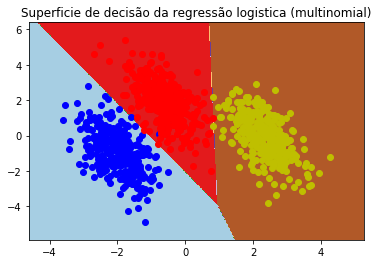

In [6]:
# Instancia e treina regressao logistica nos dados
clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class='multinomial').fit(X, y)

# Exibe score de treinamento
print("Score de treino : %.3f (%s)" % (clf.score(X, y), 'multinomial'))

# Plotando resultado da classificação
h = .02  # step size da mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plota as fronteiras de decisão das classes
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Superficie de decisão da regressão logistica (%s)" % 'multinomial')
plt.axis('tight')

# Plota os pontos de treino para visualização
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

A matemática por trás destes modelos é simples e pode ser encontrada em muitas maravilhosas fontes espalhadas pela internet, incluindo na própria [documentação](http://scikit-learn.org/stable/index.html) do Sklearn.

Uma infinidade de modelos mais avançados esta prontamente disponível, com API semelhante aos dos modelos anteriores, no Sklearn.

# Redes Neurais Artificiais, Tensorflow e Keras

No contexto de modelagem e aprendizado de máquina, as [redes neurais artificiais profundas](https://pt.wikipedia.org/wiki/Aprendizagem_profunda) vem tomando seu lugar no estado de arte como tecnicas de modelagem extremamente poderosas. Suas propriedaes intrínsecas permitem a estas estruturas aprenderem representações hierarquicas de alto nível baseadas nos dados de treinamento. Esta capacidade torna as redes neurais profundas ótimas estruturas de compressão de dados, com possibilidade de otimização utilizando propagação reversa dos gradientes (modelo diferenciavel), o que torna o seu treinamento eficiente e de rápida convergencia.

O Tensorflow é uma biblioteca da Google com *bindings* em Python, capaz de gerar e computar grafos matemáticos com altíssima eficiência. Esta biblioteca poderosíssima esta em constante evolução e vem sendo empregada em todos os setores da indústria.

O Keras nada mais é do que um modulo de alto nível por cima do Tensorflow, muito bom para prototipagem rápida e implementação de redes neurais artificiais.

Nesta sessão faremos uso do Keras para implementar redes neurais artificiais e utiliza-las para fazer predições sobre problemas de *Supervised Learning*.

Vamos utilizar para demonstração o clássico dataset MNIST. Este conjunto de dados consiste em imagens de digitos manuscritos de 0 a 9, com os respectivos rótulos associados. Estes ultimos serão utilizados como sinal de supervisão. Nosso objetivo é aprender o mapeamento entre os pixels da imagem e a respectiva classe (0 a 9) ao qual aquele digito pertence.

Inicialmente, vamos carregar o banco de dados do repositório de exemplos do tensorflow.

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Desta vez, vamos utilizar o *Mini Batch Stochastic Gradient Descent* como algoritmo de otimização. Esta tecnica utiliza amostras retiradas dos dados para calcular o gradiente do erro com relação aos parâmetros do modelo e realizar a atualização dos parâmetros. Para fazer isso, precisamos realizar a amostragem do *dataset* em *batches*. Por sorte o pessoal da Google ja deixou isso bem facilitado, e apenas chamar o método "next_batch()" no objeto *dataset* já faz o serviço. Vamos amostrar um *batch* para entender do que o banco de dados se trata.

In [8]:
batch = mnist.train.next_batch(3)
batch

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]]))

In [9]:
print("Formato da amostra de variáveis de entrada: ",batch[0].shape)
print("Formato da amostra de variáveis alvo: ",batch[1].shape)

Formato da amostra de variáveis de entrada:  (3, 784)
Formato da amostra de variáveis alvo:  (3, 10)


Vemos que a amostra contém três figuras de 784 pixels em um array *C-ordered*, cada uma com sua respectiva classe codificada em um array *one-hot*. São três figuras pois este foi o argumento passado ao método "next_batch".

O array *one-hot* é um tipo de codificação para variáveis multiclasse muito útil, e indica que a amostra é da classe $ i $, sendo $i$ o indice do elemento do array onde o elemento é igual a 1, ou seja, um array do tipo [0,0,1,0,0,0,0,0,0,0], por exemplo, indica que a figura representa o número 2.

As figuras podem ser visualizadas com o código a seguir:

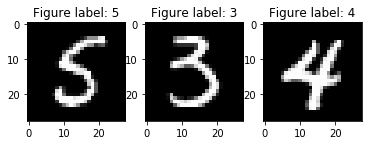

In [10]:
f, axarr = plt.subplots(1, batch[0].shape[0])

for i in range(batch[0].shape[0]):

    pixels = np.array(batch[0][i]) # carrega amostra na variavel pixels

    pixels = pixels.reshape((28, 28)) # redimensiona o array para 28x28 pixels

    # Plot
    axarr[i].set_title("Figure label: "+str(batch[1][i].nonzero()[0][0])) # define o titulo de cada imagem
    axarr[i].imshow(pixels, cmap='gray') # plota a imagem

plt.show() # mostra a figura

Para ilustrar o processo de codificar e treinar uma rede neural profunda em python, vamos utilizar o numpy como biblioteca matemática e fazer isto do rascunho para cima.

Iniciaremos declarando as funções auxiliares ao nosso processo.

- A primeira função define a estrutura do nosso modelo e inicializa suas variáveis. Uma grande variedade de inicializações pseudo-aleatórias dos pesos está disponível na literatura e o modo como se inicializa os pesos de uma rede neural profunda afeta como ela aprende. Este efeito é ligado principalmente ao fenomeno dos [*Vanishing Gradients*](https://en.wikipedia.org/wiki/Vanishing_gradient_problem), ou gradientes que desaparecem. Mais sobre este assunto mais à frente. Aqui, inicializaremos nosos pesos com distribuição normal de média zero e variancia 0.1.

### Multilayer Perceptron

In [11]:
np.random.seed(42)                                                  # fixa a random seed para obter repetibilidade dos resultados

def mlp(n_in, n_hidden, n_out):                                     # Funçao de inicializaçao das variaveis da rede neural

    U = np.random.normal(size=(n_in, n_hidden))          # Pesos da primeira layer (Distribuiçao normal com desvio 0.1 e shape (n_in, n_hidden)
    V = np.random.normal(size=(n_hidden, int(n_hidden))) # O mesmo para a segunda layer
    W = np.random.normal(size=(int(n_hidden), n_out))    # pesos layer de saida

    bu = np.zeros(n_hidden)                                         # Inicializa bias da primeira layer
    bv = np.zeros(int(n_hidden))                                    # mesmo segunda layer
    bw = np.zeros(n_out)                                            # Bias de saída

    params = [U,V,W,bu,bv,bw]                                       # transforma os parametros em lista de parametros

    return params                                                   # retorna parametros

- A segunda função é a função de ativação dos neuronios a ser utilizada. Neste caso, usaremos a função sigmoid.

In [12]:
def sigmoid(x):                                                     # Funçao de ativação dos neurons
    out = []
    for i in range(x.shape[0]):                                     # faz a sigmoid de cada valor no array
        sig_i = 1.0 / (1.0 + np.exp(-x[i]))
        out.append(sig_i)                                           # adiciona o valor de saida da sig a uma lista
                                                                    # de valores para retornar
    return np.array(out)

- A terceira função é a função de propagação direta da nossa rede neural, e será usada para fazer inferência.

In [13]:
def predict(x, U, V, W, bu, bv, bw):    # Realiza prediçoes com a rede neural
    A = np.dot(x, U) + bu               # Calcula a saída da layer 1 sem ativaçao
    B = np.dot(sigmoid(A), V) + bv      # Calcula a saida da layer de dois sem ativaçao
    C = np.dot(sigmoid(B), W) + bw      # saida layer, saida sem ativaçao
    Z = sigmoid(C)                      # ativaçao layer saida
    index = np.argmax(Z)                # adquire o index no array de 1 a 10 que corresponde ao valor da prediçao
    out = np.zeros((1, 10))             # cria array de dez valores 0
    out[0, index] = 1                   # atribui valor 1 ao valor no array cujo index corresponde a saída da layer
    return Z, out.astype(int)           # retorna probabilidade de cada valor, prediçao em one-hot

- A quarta e última função é a função de propagação reversa da rede neural. Esta função trata de calcular os gradientes do erro em relação aos parâmetros do modelo. Utilizar estes gradientes para atualizar os pesos do modelo em questão é chamado *Gradient Descent*. Quando ele é feito em amostrar menores do *dataset*, ele se torna o *Stochastic Gradient Descent*.

In [14]:
def train(x, y, U, V, W, bu, bv, bw): #funçao treinamento

    """
    PARAMETROS: x = input data
            V =  Pesos da primeira layer
            W =  Pesos da segunda layer
            bv = Bias da primeiralayer
            bw = Bias da segunda layer

    """

    t = np.transpose(y) # transpoe a matriz de entrada para realizar as multiplicaçoes matriciais

    # forward propagation
    A = np.dot(x, U) + bu   # realiza a multiplicaçao escalar da entrada pelos pesos da primeira layer
                            # e adidiona o valor do bias

    B = np.dot(sigmoid(A), V) + bv   # realiza a multiplicaçao matricial da saida da ativaçao sigmoid da primeira layer
                                     # pelos pesos da segunda layer e adiciona os bias para esta layer

    C = np.dot(sigmoid(B), W) + bw   # mesmo com a layer de saida

    Y = sigmoid(C)                   # ativaçao da layer de saida


    # backward propagation
    Ew = Y - t                       # Diferença do valor da saída predita pela saída esperada (gradiente)
    Ev = sigmoid(B) * np.dot(W, Ew)  # Calcula o erro para a layer DOIS (Gradiente do erro * pesos da segunda layer) * sigmoid(hidden))
    Eu = sigmoid(A) * np.dot(V, Ev)  # mesmo para layer um
    
    # Deltas utilizados para atualizar os pesos da rede
    dW = np.outer(sigmoid(B), Ew)    # DeltaW, Calcula a distributiva de cada termo do array e retorna lista de arrays distribuidos
    dV = np.outer(sigmoid(A), Ev)    # DeltaV  , Hadamard product
    dU = np.outer(x, Eu)             # mesmo
    loss = -np.mean(t * np.log(Y) + (1 - t) * np.log(1 - Y)) #funçao loss = cross-entropy boa para classificaçao

    return  Y, loss, (dU, dV, dW, Eu, Ev, Ew)  #retorna o valor da funçao custo e o gradiente do erro em funçao dos pesos e bias

O código a seguir implementa a rotina de treinamento do modelo no *dataset* em amostras, ou *batches*. Aqui, chamamos a função *train* em cada amostra e acumulamos os gradientes durante um *batch*. Atualizamos então os pesos do nosso modelo com a subtração dos gradientes mais um valor de momento para acelerar o treinamento. Este algoritmo é uma das formas mais simples de *Stochastic Gradient Descent* e variações mais poderosas estão disponíveis na literatura e implementadas e prontas para uso em modulos de amprendizado de máquina.

In [15]:
import time

# Parametros de treinamento
epochs = 100
batch_size = 128
learning_rate = 0.0005
momentum = 0.9
n_hidden = 128  #numero de neuronios nas hidden layers


# Adquire dados
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sample = mnist.train.next_batch(1)

#VARIAVEIS DA DNN
n_in = sample[0].shape[1]      #numero de features de entrada, neste caso o numero de pixels da imagem
n_out = sample[1].shape[1]      #numero de saídas do grapho, neste caso 10 classes diferentes
n_samples = mnist.train.num_examples - 1     #numero de exemplos no dataset

params = mlp(n_in, n_hidden, n_out)    #inicializa variaveis da rede neural

# Treinamento
print("Start Training Session")

train_err = []
train_accu = []
eval_err = []
eval_accu = []

for epoch in range(epochs):
    
    X, Y = mnist.train.next_batch(batch_size)
    X_eval, Y_eval = mnist.validation.next_batch(batch_size)
    
    err = []                                # placeholder da lista de errors
    upd = [0]*len(params)                   # placeholder dos parametros de atualizaçao dos pesos
    corr_pred = []                          # Bookkeeping
    t0 = time.clock()                       # clock para contar o tempo de treinamento
    
    for i in range(batch_size):             # realiza treinamento
        pred, loss, grad = train(X[i], Y[i], *params) # chama a funçao train

        for j in range(len(params)):    # faz o update dos parametros da rede
            params[j] -= upd[j]

        for j in range(len(params)):    # calcula o valor a ser atualizado nos parametros para o proximo ciclo
            upd[j] = learning_rate * grad[j] + momentum * upd[j]    # mi*gradiente+momento*update, gradiente com momento

        # Bookkeeping
        err.append(loss)                                            # adquire o custo em lista de errors
        corr_pred.append(np.argmax(Y[i]) == np.argmax(pred)) # adiciona corretude da prediçao em lista
    
    train_err.append(err)
    train_accu.append(corr_pred)
    
     
    if epoch % 20 == 0:
        accuracy = np.mean(corr_pred) * 100     # calcula a precisao
        print("Train Epoch: {0}, Loss: {1}, Time: {2}, Accuracy: {3}%".format(1+epoch, np.mean(err), time.clock()-t0, accuracy))
    
    err = []
    corr_pred = []
    
    for i in range(batch_size):
        Z, pred = predict(X_eval[i], *params)   # chama a funçao predict para fazer prediçoes com entradas
        t_ = np.transpose(Y_eval[i])            # transpoe a matriz de labels real para calcular perdas
        eval_loss = -np.mean(t_ * np.log(Z)     # funçao loss = cross-entropy para classificaçao
                        + (1 - t_) * np.log(1 - Z))

        # Bookkeeping
        err.append(eval_loss)
        corr_pred.append(np.argmax(Y_eval[i]) == np.argmax(pred))
    eval_err.append(err)
    eval_accu.append(corr_pred)    
    
    if epoch % 20 == 0:
        print("Eval Epoch: {0}, Loss: {1}, Time: {2}, Accuracy: {3} %".format(1+epoch, np.mean(err), time.clock()-t0, np.mean(corr_pred) * 100))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Start Training Session
Train Epoch: 1, Loss: 0.7687294209591304, Time: 2.860600999999999, Accuracy: 17.1875%
Eval Epoch: 1, Loss: 0.4454026100308948, Time: 3.460474999999999, Accuracy: 29.6875 %
Train Epoch: 21, Loss: 0.21598377350110215, Time: 2.690427999999997, Accuracy: 54.6875%
Eval Epoch: 21, Loss: 0.18891608815458322, Time: 3.3828510000000023, Accuracy: 66.40625 %
Train Epoch: 41, Loss: 0.2245722520042788, Time: 2.41580399999998, Accuracy: 50.78125%
Eval Epoch: 41, Loss: 0.214345259837915, Time: 3.0374889999999937, Accuracy: 61.71875 %
Train Epoch: 61, Loss: 0.23286526714413883, Time: 2.375789999999995, Accuracy: 48.4375%
Eval Epoch: 61, Loss: 0.2006456513479367, Time: 3.0016430000000014, Accuracy: 63.28125 %
Train Epoch: 81, Loss: 0.17745282503004411, Time: 2.6003089999999816, Accuracy: 6

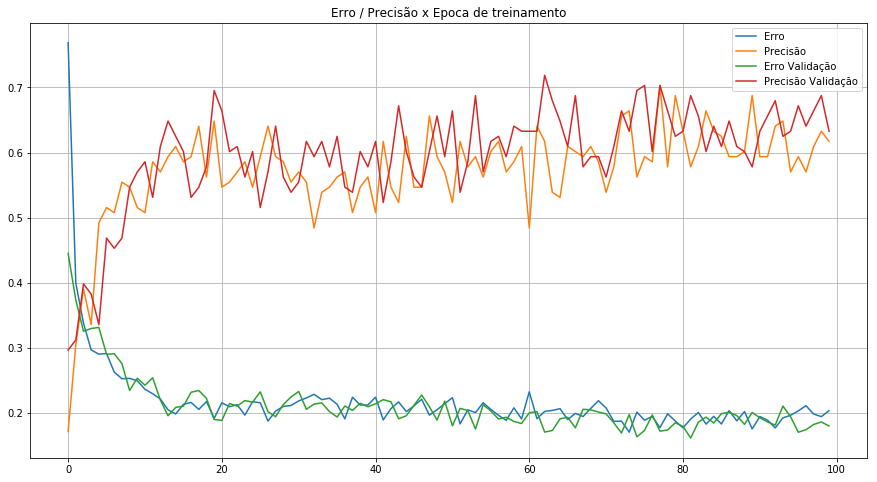

In [16]:
plt.figure(figsize=(15,8))
plt.title("Erro / Precisão x Epoca de treinamento")
plt.plot([np.sum(err) / len(err) for err in train_err], label='Erro');
plt.plot([np.sum(accu) / len(accu) for accu in train_accu], label='Precisão');
plt.plot([np.sum(err) / len(err) for err in eval_err], label='Erro Validação');
plt.plot([np.sum(accu) / len(accu) for accu in eval_accu], label='Precisão Validação');
plt.legend();
plt.grid();

Nota-se o processo de treinamento surtindo efeito sobre o erro médio e a precisão das predições do modelo. Nota-se ainda como o erro médio e precisão das amostras de teste seguem com proximidade as medidas das amostras de treinamento, indicando que não há processo de *overfiting* acontecendo. Falaremos mais sobre esse assunto mais a frente.

Demonstrada a complexidade de se implementar até mesmo um *Multilayer Perceptron* simples matematicamente com o numpy, vamos entender a implementação do mesmo modelo utilizando o Keras, o modulo de alto nível sobre o Tensorflow.

Iniciamos importando as dependencias e adquirimos o banco de dados.

In [17]:
from keras.layers import Dense, InputLayer
from keras.models import Sequential

# Adquire dados
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sample = mnist.train.next_batch(1)

#VARIAVEIS DA DNN
n_in = sample[0].shape[1]      #numero de features de entrada, neste caso o numero de pixels da imagem
n_out = sample[1].shape[1]      #numero de saídas do grapho, neste caso 10 classes diferentes
n_samples = mnist.train.num_examples - 1     #numero de exemplos no dataset

Using TensorFlow backend.


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Feito isto, vamos instanciar nosso *Multilayer Perceptron*.

In [18]:
mlp = Sequential()
mlp.add(InputLayer(input_shape=(n_in,)))
mlp.add(Dense(n_hidden, activation='sigmoid'))
mlp.add(Dense(n_out, activation='sigmoid'))

mlp.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Isto é tudo. O codigo acima instancia e compila um *Multilayer Perceptron* simples. Utilizamos *Stochastic Gradient Descent* como algoritmo de otimização assim como anteriormente. Com o modelo ja instanciado, vamos realizar seu treinamento.

In [19]:
train_history = mlp.fit(mnist.train.images[::4], mnist.train.labels[::4], batch_size=128, epochs=100,
                        validation_data=[mnist.validation.images[::4], mnist.validation.labels[::4]], verbose=0)

/home/tau/Envs/tau/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150847). Check your callbacks.
  % delta_t_median)


O método *fit* realiza todo o trabalho de propagar os gradientes e atualizar os pesos do modelo para nós. Como parametros deste método, são especificados o tamanho da amostra, o número de épocas de treinamento e os dados de validação a serem utilizados. Este método retorna um objeto história de treinamento onde ficam gravados os dados de treinamento para análise posterior.

O código abaixo utiliza este objeto para plotar os dados de erro e precisão do treinamento

Precisão na última época de treino:  0.897599999983
Erro médio na última época de treino:  0.376240706569
Precisão na última época de validação:  0.867199995232
Erro médio na última época de validação:  0.484378110456


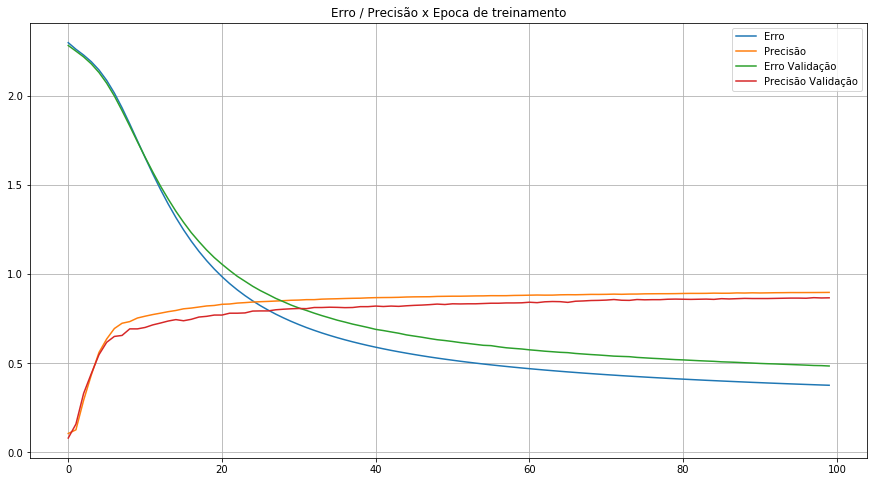

In [20]:
plt.figure(figsize=(15,8))
plt.title("Erro / Precisão x Epoca de treinamento")
plt.plot([err for err in train_history.history['loss']], label='Erro');
plt.plot([accu for accu in train_history.history['acc']], label='Precisão');
plt.plot([err for err in train_history.history['val_loss']], label='Erro Validação');
plt.plot([accu for accu in train_history.history['val_acc']], label='Precisão Validação');
plt.legend();
plt.grid();

print("Precisão na última época de treino: ", train_history.history['acc'][-1])
print("Erro médio na última época de treino: ", train_history.history['loss'][-1])
print("Precisão na última época de validação: ", train_history.history['val_acc'][-1])
print("Erro médio na última época de validação: ", train_history.history['val_loss'][-1])

Pode-se perceber que o Keras facilita muito a vida quando se trata de prototipar e testar grafos computacionais como redes neurais. Além disso, a implementação com *backend* em Tensorflow permite ao querar fazer uso da GPU como processador de matrizes, o que acelera o processamento em ordens de magnitude.

Não entraremos em detalhes sobre implementações em tensorflow por se tratar de baixo nível e fora do escopo desde manual. Contudo, muito material esta disponível na internet, a começar pela [documentação](https://www.tensorflow.org/) do Tensorflow, e faremos a cobertura deste assunto em um manual futuro.